# PyCoffee, 31 March 2016: AstroML </br> Presented by Adele

## An overview of AstroML: Machine Learning and Data Mining for Astronomy

* Python module for machine learning ("ML") and data mining built on numpy, scipy, scikit-learn, matplotlib, and astropy
* Designed with the statistical needs of astronomical community in mind (**astro-statistics**)
* The goal is a community repository, primarily using freely available astronomy datasets.  You can get/contribute to the code using github http://github.com/astroML/astroML.
* Authors are 3 astronomy professors at University of Washington and one computing professor (and software designer) at Georgia Tech.
* Find all of the information at the webpage: http://www.astroml.org/
* Cite the paper "Introduction to astroML: Machine learning for astrophysics", Vanderplas et al, proc. of CIDU, pp. 47-54, 2012. (http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6382200&tag=1)

## On the webpage, you will find:

### * General AstroML figures  
http://www.astroml.org/examples/index.html 

In [1]:
%matplotlib inline

For some AstroML examples that download public data, add this to your .bashrc:  
export ASTROML_DATA="/Users/Adele/Astro/ASTROML/[whatever path you want]" 

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


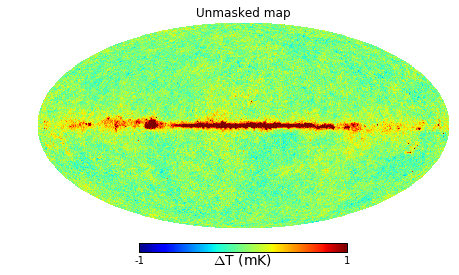

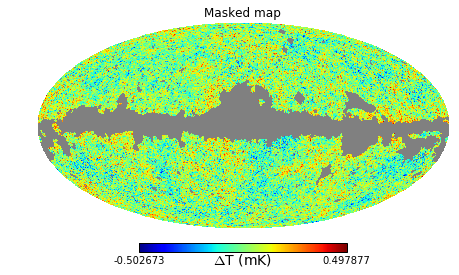

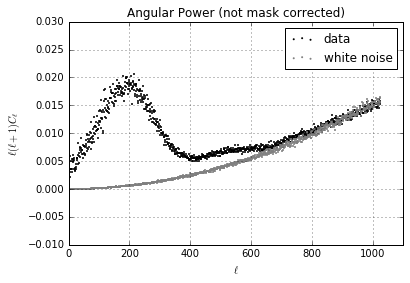

In [12]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from matplotlib import pyplot as plt

# warning: due to a bug in healpy, importing it before pylab can cause
#  a segmentation fault in some circumstances.
import healpy as hp

from astroML.datasets import fetch_wmap_temperatures

#------------------------------------------------------------
# Fetch the data
wmap_unmasked = fetch_wmap_temperatures(masked=False)
wmap_masked = fetch_wmap_temperatures(masked=True)
white_noise = np.ma.asarray(np.random.normal(0, 0.062, wmap_masked.shape))

#------------------------------------------------------------
# plot the unmasked map
fig = plt.figure(1)
hp.mollview(wmap_unmasked, min=-1, max=1, title='Unmasked map', fig=1, unit=r'$\Delta$T (mK)')
#Plot an healpix map (given as an array) in Mollweide projection.

#------------------------------------------------------------
# plot the masked map
#  filled() fills the masked regions with a null value.
fig = plt.figure(2)
hp.mollview(wmap_masked.filled(), title='Masked map',
            fig=2, unit=r'$\Delta$T (mK)')

#------------------------------------------------------------
# compute and plot the power spectrum
cl = hp.anafast(wmap_masked.filled(), lmax=1024)
ell = np.arange(len(cl))

cl_white = hp.anafast(white_noise, lmax=1024)

fig = plt.figure(3)
ax = fig.add_subplot(111)
ax.scatter(ell, ell * (ell + 1) * cl,
           s=4, c='black', lw=0,
           label='data')
ax.scatter(ell, ell * (ell + 1) * cl_white,
           s=4, c='gray', lw=0,
           label='white noise')

ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell+1)C_\ell$')
ax.set_title('Angular Power (not mask corrected)')
ax.legend(loc='upper right')
ax.grid()
ax.set_xlim(0, 1100)

plt.show()


### * Python code for all textbook figures, including a nice gallery  
http://www.astroml.org/examples/index.html 

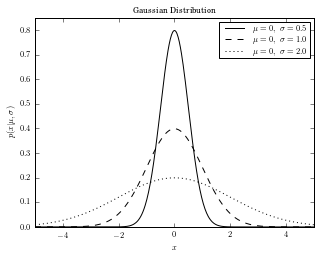

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma) #norm creates a normal continuous random variable

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()

### * An outline of some topics, with more elaborate explanation of the theory that can be found in the textbook  
http://www.astroml.org/user_guide/introduction.html

Optimization terminated successfully.
         Current function value: -2707.091713
         Iterations: 16
         Function evaluations: 46


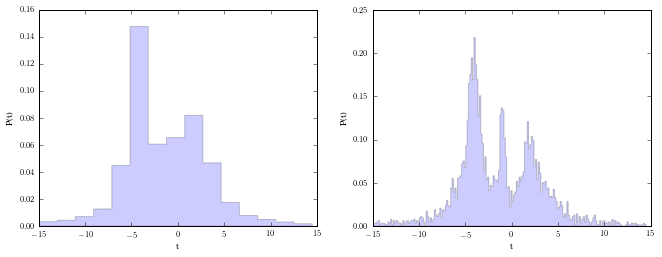

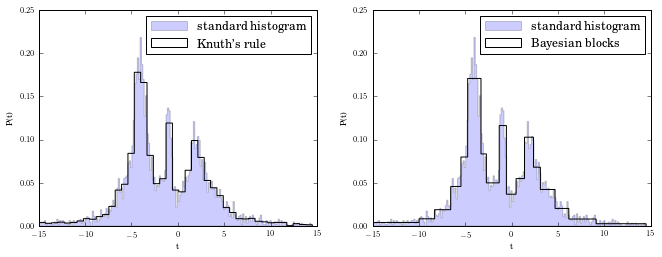

In [20]:
# Author: Jake VanderPlas <vanderplas@astro.washington.edu>
# License: BSD
#   The figure is an example from astroML: see http://astroML.github.com
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.plotting import hist

# draw a set of variables
np.random.seed(0)
t = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
t = t[(t > -15) & (t < 15)]

#------------------------------------------------------------
# First figure: show normal histogram binning
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

ax1 = fig.add_subplot(121)
ax1.hist(t, bins=15, histtype='stepfilled', alpha=0.2, normed=True)
ax1.set_xlabel('t')
ax1.set_ylabel('P(t)')

ax2 = fig.add_subplot(122)
ax2.hist(t, bins=200, histtype='stepfilled', alpha=0.2, normed=True)
ax2.set_xlabel('t')
ax2.set_ylabel('P(t)')

#------------------------------------------------------------
# Second & Third figure: Knuth bins & Bayesian Blocks
fig = plt.figure(figsize=(10, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['knuth', 'blocks'],
                                ["Knuth's rule", 'Bayesian blocks'],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(t, bins=200, histtype='stepfilled',
         alpha=0.2, normed=True, label='standard histogram')

    # plot an adaptive-width histogram on top
    hist(t, bins=bins, ax=ax, color='black',
         histtype='step', normed=True, label=title)

    ax.legend(prop=dict(size=12))
    ax.set_xlabel('t')
    ax.set_ylabel('P(t)')

plt.show()

 ### * Installation information for AstroML
 * And its useful dependencies, like python, numpy, scipy, scikit-learn, matplotlib, astropy  
 http://www.astroml.org/user_guide/installation.html

## Using github (a useful digression?)

https://guides.github.com/activities/hello-world

<img src="https://guides.github.com/activities/hello-world/branching.png">

## For more from the author, follow this tutorial: 
https://www.youtube.com/watch?v=HC0J_SPm9co